In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

In [49]:
# read the first CSV file
df1 = pd.read_csv('measurements.csv')

df1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [50]:
# We will change the data type of columns distance, temp_inside. They're using a comma as a decimal separator so it's considered an object
print(df1.dtypes)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object


## Data Cleaning

In [51]:
# 1. Checking for missing data
print(df1.isnull().sum())

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [52]:
# a) We can safely remove 'specials' + 'refill liters'/'gas' columns as we will be using the rest of the columns for our linear regression.
    # If we were to fill these NaaNs there'd been a high risk of overfitting
    
    
df1 = df1.dropna(subset=['specials', 'refill liters', 'refill gas'])

In [53]:
# b) Replace NaN values in column 'temp_inside' with the value in the previous row
    # While looking at the data we realized the values were grouped and in order.
    
df1['temp_inside'] = df1['temp_inside'].fillna(df1['temp_inside'].shift())

C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_9916\754258358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp_inside'] = df1['temp_inside'].fillna(df1['temp_inside'].shift())


In [54]:
# c) Checking for duplicate rows

duplicate_rows = df1[df1.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [55]:
# d) Replace commas with dots and convert to float
df1['distance'] = df1['distance'].str.replace(',', '.').astype(float)
df1['consume'] = df1['consume'].str.replace(',', '.').astype(float)
df1['temp_inside'] = df1['temp_inside'].str.replace(',', '.').astype(float)

# print the resulting dataframe with float values
print(df1)

     distance  consume  speed  temp_inside  temp_outside            specials  \
139      16.1      5.4     24         21.5             7                rain   
191      43.7      4.7     44         22.0             9  half rain half sun   
274      25.7      4.9     50         22.0            10                rain   

    gas_type  AC  rain  sun refill liters refill gas  
139      E10   0     1    0            38        E10  
191     SP98   0     1    0            10       SP98  
274     SP98   0     1    0            41       SP98  


C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_9916\2647244383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['distance'] = df1['distance'].str.replace(',', '.').astype(float)
C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_9916\2647244383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['consume'] = df1['consume'].str.replace(',', '.').astype(float)
C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_9916\2647244383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

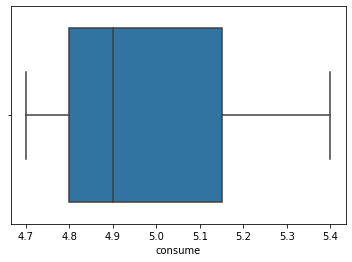

In [56]:
# e) Check for outliers in 'consume'
sns.boxplot(x=df1['consume'])
plt.show()

In [58]:
# Exporting the data into a new dataset to later upload it into the database
df1.to_csv('df2.csv', index=False)

## Exploratory Data Analysis

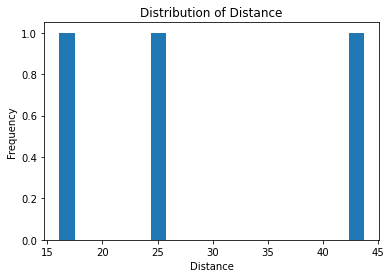

In [12]:
# Histogram of the 'distance' column
plt.hist(df1['distance'], bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()

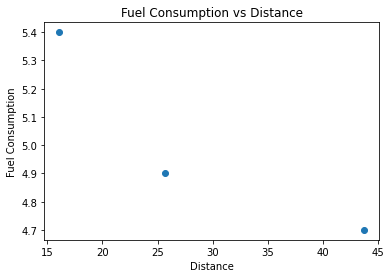

In [13]:
# Scatterplot of 'distance' vs 'consume'
    # The Fuel Consumption is higher when the distance is short. 
    # This could be because in the city the consumption is higher
plt.scatter(df1['distance'], df1['consume'])
plt.xlabel('Distance')
plt.ylabel('Fuel Consumption')
plt.title('Fuel Consumption vs Distance')
plt.show()


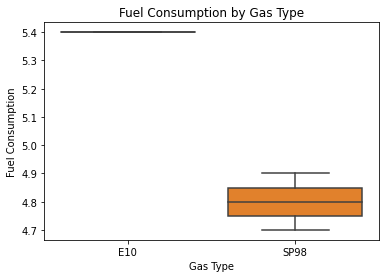

In [14]:
# Boxplot of 'consume' for different gas types
    # Consumption is higher when E10 type of gas is used
sns.boxplot(x='gas_type', y='consume', data=df1)
plt.xlabel('Gas Type')
plt.ylabel('Fuel Consumption')
plt.title('Fuel Consumption by Gas Type')
plt.show()

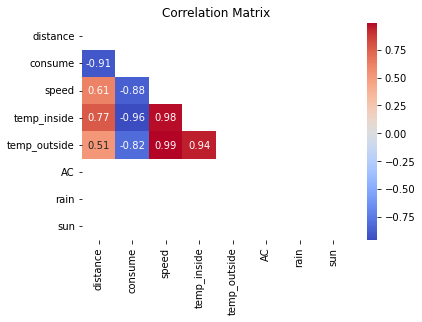

In [15]:
# Heatmap of the correlation matrix
    # Consume has little correlation with any of the features
    # temp_inside and outside are correlated with speed. We tend to speed when it's sunny and slow down when it's raining.
corr_matrix = df1.corr()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

gas_type  E10  SP98
mean      5.4   4.8
median    5.4   4.8
amin      5.4   4.7
amax      5.4   4.9


C:\Users\ela.apetrei\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ela.apetrei\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ela.apetrei\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'gas_type & consume')

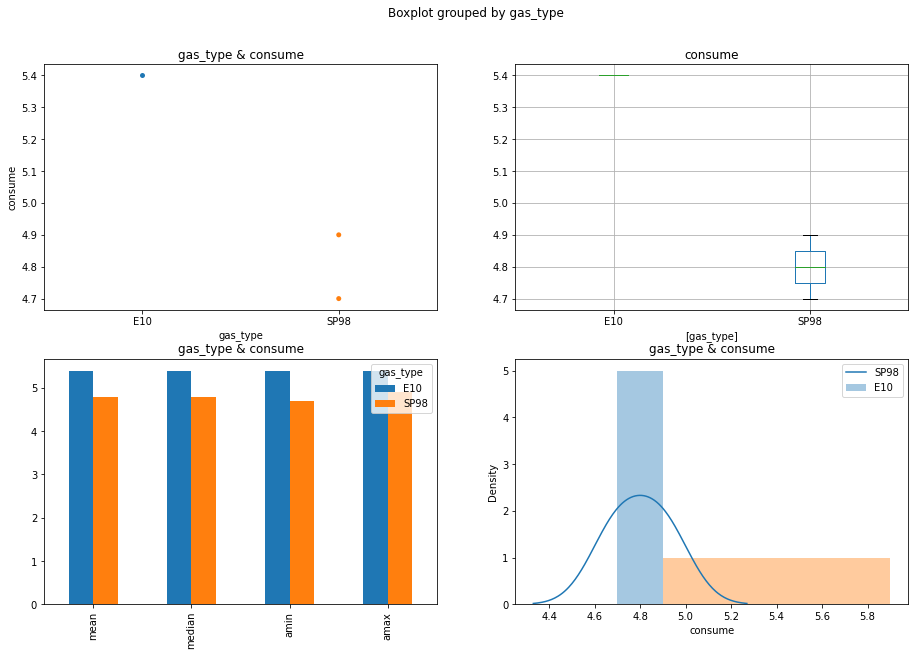

In [16]:
# Again, E10 gas seems to consume more than SP98

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=df1['gas_type'],
              y=df1['consume'],ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,2)
t=df1[["consume","gas_type"]]
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(2,2,3)
c=df1.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

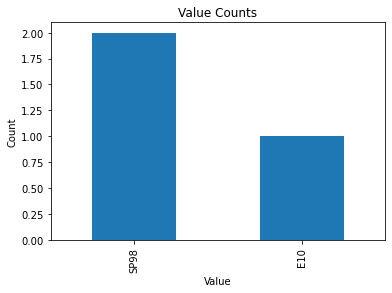

In [17]:
# It also seems there's less E10 values than SP98
value_counts = df1['gas_type'].value_counts()
value_counts.plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

## Predicting Petrol consumption

In [25]:
# Encoding
df1 = pd.get_dummies(df1, drop_first=True)
df1

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,specials_rain,gas_type_SP98,refill liters_38,refill liters_41,refill gas_SP98
139,16.1,5.4,24,21.5,7,0,1,0,1,0,1,0,0
191,43.7,4.7,44,22.0,9,0,1,0,0,1,0,0,1
274,25.7,4.9,50,22.0,10,0,1,0,1,1,0,1,1


In [33]:
x=df1.drop(['consume'],axis=1)

In [34]:
y=df1['consume']

In [35]:
l.fit(x,y)

LinearRegression()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
l.fit(x_train,y_train)

LinearRegression()

### Analyze Results & Conclusions

In [38]:
y_pred=l.predict(x_test)

In [39]:
print(l.coef_,l.intercept_)

[-0.00991736  0.00330579  0.          0.00055096  0.          0.
  0.          0.00055096  0.          0.          0.00055096  0.        ] 4.982975206611571


In [45]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.24299739392421502
0.492947658402203
0.492947658402203


The accuracy of the model is performing reasonably well. However, the R2 indicates that the variation in the dependent variable is not explained by the model.